In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams.update({'font.size': 14})

In [9]:
def calc_std(data, instr=0):
    return f"{np.mean(data)} +- {np.sqrt(np.std(data)**2+instr**2)}"

wiredata = pd.read_csv("wiredata.csv", header=None).to_numpy()
(calc_std(wiredata[0], 0.1), calc_std(wiredata[1], 0.005))

('0.29999999999999993 +- 0.1', '0.365 +- 0.007745966692414839')

In [62]:
l = [20, 30, 50]
cols = pd.MultiIndex.from_product([l, ['U, mV', 'I, mA']], names=['l, cm', None])
data = pd.read_csv("data.csv", header=None)
data.columns = cols
data.index = np.arange(1, 13)
data

l, cm     20           30           50      
       U, mV I, mA  U, mV I, mA  U, mV I, mA
1       11.0     5   15.9     5   65.3  12.5
2       30.7    15   47.3    15  107.0  20.0
3       52.9    25   77.6    25  183.6  35.0
4       74.1    35  114.1    35  292.5  55.0
5      117.1    55  175.8    55  399.8  75.0
6      160.2    75  240.4    75  345.2  65.0
7      139.2    65  208.3    65  240.7  45.0
8      106.4    50  159.4    50  128.4  25.0
9       85.8    40  126.7    40  373.6  70.0
10      63.1    30   96.2    30  321.1  60.0
11      41.5    20   64.3    20  156.2  30.0
12      20.8    10   31.6    10   25.1   5.0

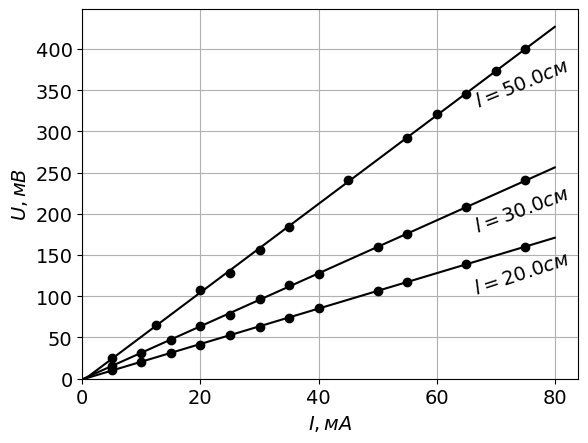

In [114]:
npdata = data.to_numpy().T
gen = iter(npdata)
plt.xlabel("$I, мА$")
plt.ylabel("$U, мВ$")
plt.grid()
for i, (U, I) in enumerate(zip(gen, gen)):
    k, b = np.polyfit(I, U, 1)
    x = np.array([0, 80])
    y = x * k + b
    plt.plot(I, U, 'ok')
    plt.plot(x, y, 'k')
    ang = np.arctan(k) * 16
    plt.text(I.max()-9, U.max()*0.95-50, f"$l={l[i]:.1f} см$", rotation=ang)
plt.xlim(0)
plt.ylim(0)
plt.savefig('plot.svg')
# plt.plot(npdata[0][:8], npdata[1][:8])    